# sec-certs Python API demo

In this demo, we will:
1. Fetch the fully processed dataset from our web
2. Turn the dataset into a [pandas](https://pandas.pydata.org/) dataframe -- a data structure suitable for further data analysis.
3. Filter the dataset to certificates of our interest
4. Explore various attrributes of a dataset and its individual certificate
5. Learn how to go from a single vulnerability to all certificates that *may suffer* from the vulnerability
6. Plot various characteristics of the dataset


## 1. Fetch the fully processed dataset from our web

In [1]:
# First, import the necessary libraries
from sec_certs.dataset import CCDataset
import pandas as pd

In [2]:
# Download the dataset and see how many certificates it contains
dataset = CCDataset.from_web_latest()
print(f"The downloaded CCDataset contains {len(dataset)} certificates")

The downloaded CCDataset contains 5330 certificates


In [4]:
# # Don't run this! This creates new empty dataset, crawls commoncriteriaportal.org and processed all certificates.
# dset = CCDataset()
# dset.get_certs_from_web()
# dset.process_auxillary_datasets()
# dset.download_all_artifacts()
# dset.convert_all_pdfs()
# dset.analyze_certificates()

## 2. Turn the dataset into a [pandas](https://pandas.pydata.org/) dataframe -- a data structure suitable for further data analysis.

In [5]:
df = dataset.to_pandas()

In [6]:
# print columns of the dataset
df.columns

Index(['cert_id', 'name', 'status', 'category', 'manufacturer', 'scheme',
       'security_level', 'eal', 'not_valid_before', 'not_valid_after',
       'report_link', 'st_link', 'cert_link', 'manufacturer_web',
       'extracted_versions', 'cpe_matches', 'verified_cpe_matches',
       'related_cves', 'directly_referenced_by', 'indirectly_referenced_by',
       'directly_referencing', 'indirectly_referencing', 'extracted_sars',
       'protection_profiles', 'cert_lab', 'year_from'],
      dtype='object')

In [7]:
# Select a single column
df_vulns = df.related_cves
df_vulns.head()

dgst
8298c7814b3b2860    NaN
9a1c767d358eee50    NaN
979e00ac7d3e229c    NaN
a6015339aa4434cf    NaN
a89ee15539d006d1    NaN
Name: related_cves, dtype: object

In [8]:
# Save the dataset as json (might not work from browser)
dataset.to_json("cc_dataset.json")

## 3. Filter the dataset to certificates of our interest

In [9]:
# Select only certificates that have some related cves
vulnerable_certificates = df.loc[df.related_cves.notnull()]

# Select only certificates from BSI
bsi_certs = df.loc[df.cert_lab == "BSI"]

# Select only certificates certified in 2017 or later
certs_2017_and_newer = df.loc[df.not_valid_before.dt.year >= 2017]

# select only active certificates
active_certificates = df.loc[df.status == "active"]

# Select only certificates that reference some other certificate
reference_rich_certificates = df.loc[df.directly_referencing.notnull()]

# Select only certificates with EAL6 and higher
eal6_or_more = df.loc[df.eal >= "EAL6"]

In [10]:
# Show arbitrary subset that we've defined earlier 
eal6_or_more.head()

,cert_id,name,status,category,manufacturer,scheme,security_level,eal,not_valid_before,not_valid_after,...,verified_cpe_matches,related_cves,directly_referenced_by,indirectly_referenced_by,directly_referencing,indirectly_referencing,extracted_sars,protection_profiles,cert_lab,year_from
dgst,,,,,,,,,,,,,,,,,,,,,
ef1fba0df82eb56e,BSI-DSZ-CC-1096-2021,Arbit Data Diode 10 GbE v1.00,active,Boundary Protection Devices and Systems,Arbit Cyber Defence Systems ApS,DE,"{EAL7+, ALC_FLR.1}",EAL7+,2021-04-07,2026-04-07,...,NaN,NaN,NaN,NaN,NaN,NaN,"{SAR(family='ALC_FLR', level=1), SAR(family='A...",NaN,BSI,2021
167ed26aa5bc8193,NSCIB-CC-163925-CR,Fort Fox Hardware Data Diode FFHDD3_1/10,active,Boundary Protection Devices and Systems,Fox-IT B.V.,NL,"{ALC_FLR.3, ASE_TSS.2, EAL7+}",EAL7+,2018-07-11,2023-07-11,...,NaN,NaN,NaN,NaN,NaN,NaN,"{SAR(family='ASE_CCL', level=1), SAR(family='A...",NaN,NaN,2018
6cd7a7a1cffaa67e,NSCIB-CC-0095534-CR3,NXP JCOP 4.7 SE051,active,"ICs, Smart Cards and Smart Card-Related Device...",NXP Semiconductors,NL,"{ASE_TSS.2, EAL6+, ALC_FLR.1}",EAL6+,2023-03-27,2028-03-27,...,NaN,NaN,NaN,NaN,"{BSI-DSZ-CC-1136-V3-2022, NSCIB-CC-180212-CR5}","{BSI-DSZ-CC-1136-2021, BSI-DSZ-CC-1136-V3-2022...","{SAR(family='ALC_FLR', level=1), SAR(family='A...",[Java Card Protection Profile - Open Configura...,NaN,2023
51e4fcdced4053b0,ANSSI-CC-2023/14,S3D384C/S3D352C/S3D300C/S3D264C/S3D232C/S3K384...,active,"ICs, Smart Cards and Smart Card-Related Device...","Samsung Electronics Co., Ltd.",FR,"{ASE_TSS.2, EAL6+}",EAL6+,2023-03-02,2028-03-02,...,NaN,NaN,NaN,NaN,{ANSSI-CC-2021/56},{ANSSI-CC-2021/56},"{SAR(family='ASE_CCL', level=1), SAR(family='A...",[Security IC Platform Protection Profile with ...,NaN,2023
1116a6b1b0edbf8d,NSCIB-CC-66030-CR6,NXP Crypto Library V3.1.x on P6021y VB,active,"ICs, Smart Cards and Smart Card-Related Device...","NXP Semiconductors Germany GmbH, Business Unit...",NL,"{ASE_TSS.2, EAL6+, ALC_FLR.1}",EAL6+,2023-02-16,2028-02-16,...,NaN,NaN,NaN,NaN,{BSI-DSZ-CC-1072-V5-2022},"{BSI-DSZ-CC-1072-V2-2019, BSI-DSZ-CC-1072-V5-2...","{SAR(family='ASE_CCL', level=1), SAR(family='A...",[Security IC Platform Protection Profile with ...,NaN,2023


## 4. Explore various attrributes of a dataset and its individual certificate

In [12]:
# Select a single certificate by its digest
cert = dataset["15d68159595eae09"]
print(cert)

Infineon Technologies AG Infineon Security Controller M7892 B11 with optional RSA2048/4096 v1.02.013 or v2.07.003, EC v1.02.013 or v2.07.003, SHA-2 v1.01, SCL v2.02.012, Base v1.02.013 or v2.07.003, and Toolbox v1.02.013 or v2.07.003 libraries and with specific IC dedicated software (firmware) dgst: 15d68159595eae09


In [13]:
# Display attributes of this certificate
vars(cert)

{'status': 'active',
 'category': 'ICs, Smart Cards and Smart Card-Related Devices and Systems',
 'name': 'Infineon Security Controller M7892 B11 with optional RSA2048/4096 v1.02.013 or v2.07.003, EC v1.02.013 or v2.07.003, SHA-2 v1.01, SCL v2.02.012, Base v1.02.013 or v2.07.003, and Toolbox v1.02.013 or v2.07.003 libraries and with specific IC dedicated software (firmware)',
 'manufacturer': 'Infineon Technologies AG',
 'scheme': 'DE',
 'security_level': {'ALC_FLR.1', 'EAL6+'},
 'not_valid_before': datetime.date(2020, 11, 26),
 'not_valid_after': datetime.date(2025, 11, 26),
 'report_link': 'https://www.commoncriteriaportal.org/files/epfiles/0782V5a_pdf.pdf',
 'st_link': 'https://www.commoncriteriaportal.org/files/epfiles/0782V5b_pdf.pdf',
 'cert_link': 'https://www.commoncriteriaportal.org/files/epfiles/0782V5c_pdf.pdf',
 'manufacturer_web': 'https://www.infineon.com/',
 'protection_profiles': {ProtectionProfile(pp_name='Security IC Platform Protection Profile, Version 1.0', pp_eal='

In [14]:
# Focus on extracted heuristics
vars(cert.heuristics)

{'extracted_versions': {'1.01', '1.02.013', '2.02.012', '2.07.003'},
 'cpe_matches': {'cpe:2.3:a:infineon:rsa_library:1.02.013:*:*:*:*:*:*:*'},
 'verified_cpe_matches': None,
 'related_cves': {'CVE-2017-15361'},
 'cert_lab': ['BSI'],
 'cert_id': 'BSI-DSZ-CC-0782-V5-2020',
 'st_references': References(directly_referenced_by={'BSI-DSZ-CC-1088-2022', 'KECS-ISIS-1139-2021', 'KECS-ISIS-1113-2021', 'KECS-ISIS-1140-2021'}, indirectly_referenced_by={'BSI-DSZ-CC-1088-2022', 'KECS-ISIS-1139-2021', 'KECS-ISIS-1113-2021', 'KECS-ISIS-1140-2021'}, directly_referencing=None, indirectly_referencing=None),
 'report_references': References(directly_referenced_by={'KECS-ISIS-1139-2021', 'KECS-ISIS-1113-2021', 'KECS-ISIS-1140-2021'}, indirectly_referenced_by={'KECS-ISIS-1139-2021', 'KECS-ISIS-1113-2021', 'KECS-ISIS-1140-2021'}, directly_referencing={'BSI-DSZ-CC-0782-V4-2018'}, indirectly_referencing={'BSI-DSZ-CC-0782-V3-2017', 'BSI-DSZ-CC-0782-V4-2018', 'BSI-DSZ-CC-0782-V2-2015', 'BSI-DSZ-CC-0782-2012'}),

## 5. Learn how to go from a single vulnerability to all certificates that *may suffer* from the vulnerability

In [15]:
# Search for certificate IDs of certs vulnerable to RoCA CVE (CVE-2017-15361)
roca_cve_id = 'CVE-2017-15361'
df["is_vulnerable_to_roca"] = df.related_cves.map(lambda x: False if pd.isnull(x) else roca_cve_id in x)
df.loc[df.is_vulnerable_to_roca, "cert_id"].to_list()

['BSI-DSZ-CC-0782-V5-2020',
 'BSI-DSZ-CC-0964-V4-2019',
 'BSI-DSZ-CC-0782-V4-2018',
 'BSI-DSZ-CC-0964-V3-2017',
 'BSI-DSZ-CC-0782-V3-2017',
 'BSI-DSZ-CC-0926-V2-2017',
 'BSI-DSZ-CC-0782-V2-2015',
 'BSI-DSZ-CC-0829-V2-2015',
 'BSI-DSZ-CC-0891-2015',
 'BSI-DSZ-CC-0964-2015',
 'BSI-DSZ-CC-0926-2014',
 'BSI-DSZ-CC-0917-2014',
 'BSI-DSZ-CC-0907-2013',
 'BSI-DSZ-CC-0782-2012',
 'BSI-DSZ-CC-0829-2012',
 'BSI-DSZ-CC-0758-2012']

In [16]:
# Inspect individual certificate that might suffer from RoCA vuln.
print(dataset["15d68159595eae09"])

Infineon Technologies AG Infineon Security Controller M7892 B11 with optional RSA2048/4096 v1.02.013 or v2.07.003, EC v1.02.013 or v2.07.003, SHA-2 v1.01, SCL v2.02.012, Base v1.02.013 or v2.07.003, and Toolbox v1.02.013 or v2.07.003 libraries and with specific IC dedicated software (firmware) dgst: 15d68159595eae09


In [17]:
# Given certificates that suffer from ROCA, which certified products reference them?
roca_vulnerable_cert_ids = df.loc[df.is_vulnerable_to_roca, "cert_id"].to_list()
df["references_roca"] = df.indirectly_referencing.map(lambda x: False if pd.isnull(x) else any(y in x for y in roca_vulnerable_cert_ids))

df_roca_affected = df.loc[df.references_roca]

🎉 `df_roca_affected` dataframe now holds certified products that reference certified products directly affected by RoCA vulnerability. **Let's take a look**

In [18]:
df_roca_affected.head()

,cert_id,name,status,category,manufacturer,scheme,security_level,eal,not_valid_before,not_valid_after,...,directly_referenced_by,indirectly_referenced_by,directly_referencing,indirectly_referencing,extracted_sars,protection_profiles,cert_lab,year_from,is_vulnerable_to_roca,references_roca
dgst,,,,,,,,,,,,,,,,,,,,,
6a07be907f66f5d1,BSI-DSZ-CC-1147-V2-2023,MTCOS Pro 2.5 EAC with PACE / P71D352 (N7121),active,"ICs, Smart Cards and Smart Card-Related Device...",MaskTech International GmbH,DE,"{EAL5+, ALC_DVS.2, AVA_VAN.5}",EAL5+,2023-02-22,2028-02-22,...,{BSI-DSZ-CC-1148-V2-2023},{BSI-DSZ-CC-1148-V2-2023},"{BSI-DSZ-CC-1136-V3-2022, BSI-DSZ-CC-1147-2020...","{BSI-DSZ-CC-0891-2015, BSI-DSZ-CC-1136-V3-2022...","{SAR(family='ASE_CCL', level=1), SAR(family='A...",[Machine Readable Travel Document with ICAO Ap...,BSI,2023,False,True
49bcce8117e22c62,BSI-DSZ-CC-1148-V2-2023,MTCOS Pro 2.5 EAC with PACE / P71D352 (N7121) ...,active,"ICs, Smart Cards and Smart Card-Related Device...",MaskTech International GmbH,DE,"{ALC_DVS.2, EAL4+}",EAL4+,2023-02-22,2028-02-22,...,NaN,NaN,"{BSI-DSZ-CC-1147-V2-2023, BSI-DSZ-CC-1136-V3-2...","{BSI-DSZ-CC-0891-2015, BSI-DSZ-CC-1136-V3-2022...","{SAR(family='ASE_CCL', level=1), SAR(family='A...",[Protection Profile for Machine Readable Trave...,BSI,2023,False,True
01cb2ad202b5df12,ANSSI-CC-2022/68,ACOS-IDv2.1 eMRTD (A) BAC Configuration(Versio...,active,"ICs, Smart Cards and Smart Card-Related Device...",Austria Card plastikkarten und Ausweissysteme ...,FR,"{ALC_TAT.2, ALC_FLR.1, EAL4+, ALC_CMS.5, ADV_T...",EAL4+,2022-12-15,2027-12-15,...,NaN,NaN,"{ANSSI-CC-2022/08, BSI-DSZ-CC-1110-V5-2022}","{BSI-DSZ-CC-1110-V4-2021, BSI-DSZ-CC-0945-2017...","{SAR(family='ALC_FLR', level=1), SAR(family='A...",[Protection Profile for Machine Readable Trave...,NaN,2022,False,True
37739e3954762bc2,ANSSI-CC-2022/64,ACOS-IDv2.1 SSCD (A) CB-Comm (Version 2.1 SSCD...,active,"ICs, Smart Cards and Smart Card-Related Device...",Austria Card plastikkarten und Ausweissysteme ...,FR,"{EAL5+, ALC_DVS.2, ALC_FLR.1, AVA_VAN.5}",EAL5+,2022-12-15,2027-12-15,...,NaN,NaN,"{ANSSI-CC-2022/19, BSI-DSZ-CC-1110-V5-2022}","{ANSSI-CC-2022/19, BSI-DSZ-CC-0945-2017, BSI-D...","{SAR(family='ALC_FLR', level=1), SAR(family='A...",[Protection profiles for secure signature crea...,NaN,2022,False,True
a4b7ab85878030d7,ANSSI-CC-2022/65,ACOS-IDv2.1 SSCD (A) CL-TC-Comm (Version 2.1 S...,active,"ICs, Smart Cards and Smart Card-Related Device...",Austria Card plastikkarten und Ausweissysteme ...,FR,"{EAL5+, ALC_DVS.2, ALC_FLR.1, AVA_VAN.5}",EAL5+,2022-12-15,2027-12-15,...,NaN,NaN,"{ANSSI-CC-2022/20, BSI-DSZ-CC-1110-V5-2022}","{BSI-DSZ-CC-1110-V4-2021, BSI-DSZ-CC-0945-2017...","{SAR(family='ALC_FLR', level=1), SAR(family='A...",[Protection profiles for secure signature crea...,NaN,2022,False,True


In [19]:
# Say that you're interested into `ANSSI-CC-2013/55` that was deployed in Estonia. Is it affected? Let's find out.
df_roca_affected.loc[df.cert_id == "ANSSI-CC-2013/55"]

,cert_id,name,status,category,manufacturer,scheme,security_level,eal,not_valid_before,not_valid_after,...,directly_referenced_by,indirectly_referenced_by,directly_referencing,indirectly_referencing,extracted_sars,protection_profiles,cert_lab,year_from,is_vulnerable_to_roca,references_roca
dgst,,,,,,,,,,,,,,,,,,,,,
350581534e265186,ANSSI-CC-2013/55,Plateforme jTOP INFv#46 masquée sur composants...,archived,"ICs, Smart Cards and Smart Card-Related Device...",Trusted Logic / Infineon,FR,"{EAL5+, ALC_DVS.2, AVA_VAN.5}",EAL5+,2013-08-07,2019-09-01,...,"{ANSSI-CC-2015/25, ANSSI-CC-2013/64}","{ANSSI-CC-2015/25, ANSSI-CC-2013/64}",{BSI-DSZ-CC-0829-2012},"{BSI-DSZ-CC-0829-2012, BSI-DSZ-CC-0728-2011, B...","{SAR(family='ALC_DVS', level=2), SAR(family='A...",[Java Card™ System Protection Profile Open Con...,SERMA,2013,False,True


## 6. Plot various characteristics of the dataset

<AxesSubplot: >

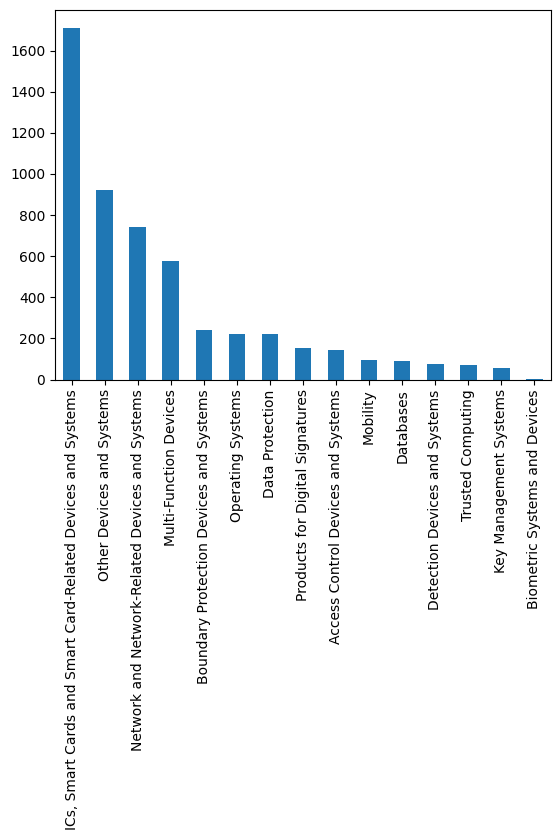

In [20]:
# Different categories
df.category.value_counts().plot.bar()

<AxesSubplot: >

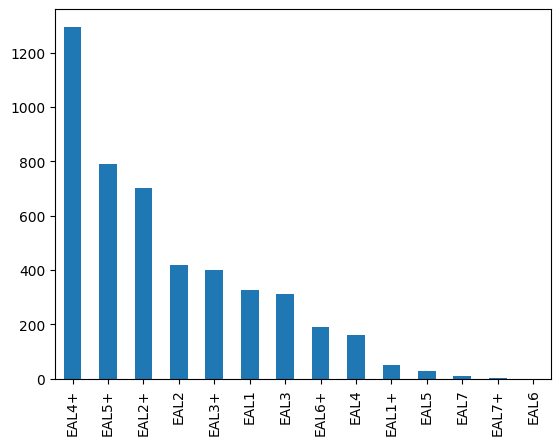

In [21]:
# Different EAL levels
df.eal.value_counts().plot.bar()

<AxesSubplot: >

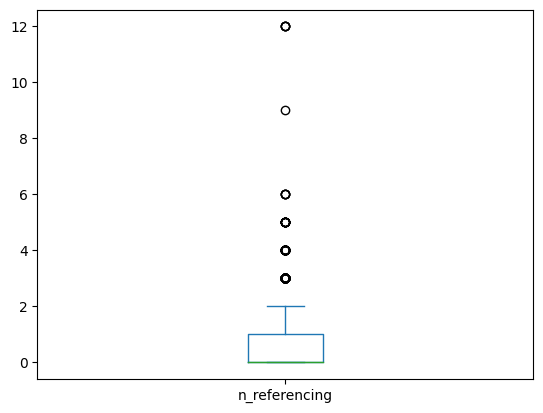

In [22]:
# Number of referenced certificates
df["n_referencing"] = df.directly_referencing.map(lambda x: 0 if pd.isnull(x) else len(x))
df.n_referencing.plot.box()

In [23]:
# Take a look at the columns and try to plot an attribute of your interest.

## Showcase of complicated plots that can be produced with our dataframe

![alt text](img/boxplot_validity.png "Title") ![alt text](img/cves_n_days_after_certification.png "Title")